# Thermal Expansion Coefficient
## Example E13 from NIST 1900

Reference: NIST Technical Note 1900 (http://dx.doi.org/10.6028/NIST.TN.1900)


### Gaussian Inputs

The E13 example first sets up the calculation assuming all Gaussian inputs. It computes mean value and expanded uncertainties at 95% and 99% coverage.

In [1]:
import suncal
import matplotlib.pyplot as plt

In [2]:
u = suncal.Model('(L1-L0)/(L0*(T1-T0))')
u.var('L0').measure(1.4999, units='m').typeb(name='uL0', std=0.0001)
u.var('T0').measure(288.15, units='K').typeb(name='uT0', std=0.02)
u.var('L1').measure(1.5021, units='m').typeb(name='uL1', std=0.0002)
u.var('T1').measure(373.10, units='K').typeb(name='uT1', std=0.05)
result = u.calculate()

display(result)
display(result.report.expanded(conf=0.95))
display(result.report.expanded(conf=0.99))

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$f_{1}$   | GUM          | 0.0000173 1/K  | 1.8e-06 1/K           | ± 3.4e-06 1/K     | 1.960     | inf           |
|$f_{1}$   | Monte Carlo  | 0.0000173 1/K  | 1.8e-06 1/K           | (0.0000138 1/K, 0.0000207 1/K) | 1.959     | -             |

---

### Student Inputs

Next, the example supposes the inputs are t-distributions with 3 degrees of freedom, and recalculates.

In [3]:
u = suncal.Model('(L1-L0)/(L0*(T1-T0))')
u.var('L0').measure(1.4999, units='m').typeb(name='uL0', dist='t', df=3, std=0.0001)
u.var('T0').measure(288.15, units='K').typeb(name='uT0', dist='t', df=3, std=0.02)
u.var('L1').measure(1.5021, units='m').typeb(name='uL1', dist='t', df=3, std=0.0002)
u.var('T1').measure(373.10, units='K').typeb(name='uT1', dist='t', df=3, std=0.05)
report = u.calculate()

display(result)
display(result.report.expanded(conf=0.95))
display(result.report.expanded(conf=0.99))

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$f_{1}$   | GUM          | 0.0000173 1/K  | 1.8e-06 1/K           | ± 3.4e-06 1/K     | 1.960     | inf           |
|$f_{1}$   | Monte Carlo  | 0.0000173 1/K  | 1.8e-06 1/K           | (0.0000138 1/K, 0.0000207 1/K) | 1.959     | -             |

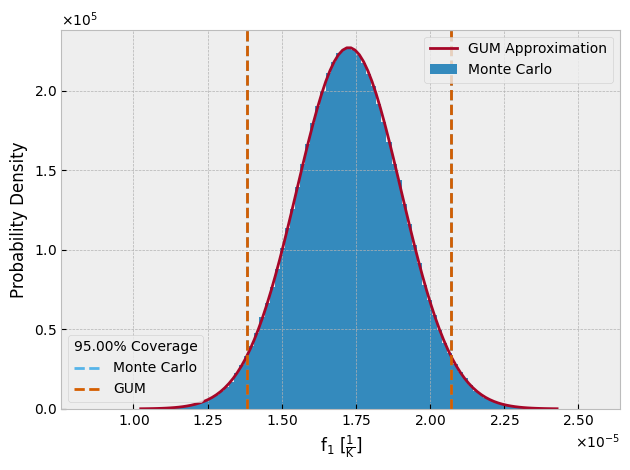

In [4]:
result.report.plot.pdf(interval=.95);